In [2]:
# import the libraries
import tensorflow as tf
from keras._tf_keras.keras import layers
import keras

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# define the file path
file_path = "datasets/fuel_optimal_db.csv"

# Load the data using pandas
data = pd.read_csv(file_path)

# drop unused columns
columns_to_drop = ["mima [kg]", "mima2 [kg]", "mima3 [kg]", "mfms_approx"]
data = data.drop(columns=columns_to_drop)

# Preprocess data
y = data["mt [kg]"] / data["ms [kg]"] # put the data in 0-1 range
X = data.drop("mt [kg]", axis=1)

# split data in train and test -- 20% of the dataset is used for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Multi Layer Perceptron

# initialize the model
model = keras.Sequential(
    [
        layers.InputLayer(shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid"),
    ]
)

# compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

In [6]:
# train the model
with tf.device('/GPU:0'):
    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=10,
        verbose=1,
        batch_size=32,
    )

Epoch 1/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 30s 867us/step - loss: 0.0024 - mean_absolute_error: 0.0344
Epoch 2/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 29s 880us/step - loss: 0.0011 - mean_absolute_error: 0.0255
Epoch 3/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 30s 888us/step - loss: 0.0011 - mean_absolute_error: 0.0251
Epoch 4/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 28s 856us/step - loss: 0.0011 - mean_absolute_error: 0.0249
Epoch 5/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 30s 901us/step - loss: 0.0011 - mean_absolute_error: 0.0248
Epoch 6/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 29s 858us/step - loss: 0.0010 - mean_absolute_error: 0.0247
Epoch 7/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 29s 873us/step - loss: 0.0010 - mean_absolute_error: 0.0246
Epoch 8/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 32s 952us/step - loss: 0.0010 - mean_absolute_error: 0.0246
Epoch 9/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 28s 851us/step - loss: 0.0010 - mean_absolute_error: 0.0245
Epoch 10/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 28s 850us/step - lo

In [7]:
# evaluate and check the history
test_loss = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)
train_mae = history.history["mean_absolute_error"]

8297/8297 ━━━━━━━━━━━━━━━━━━━━ 5s 565us/step - loss: 8.3678e-04 - mean_absolute_error: 0.0219
8297/8297 ━━━━━━━━━━━━━━━━━━━━ 5s 565us/step


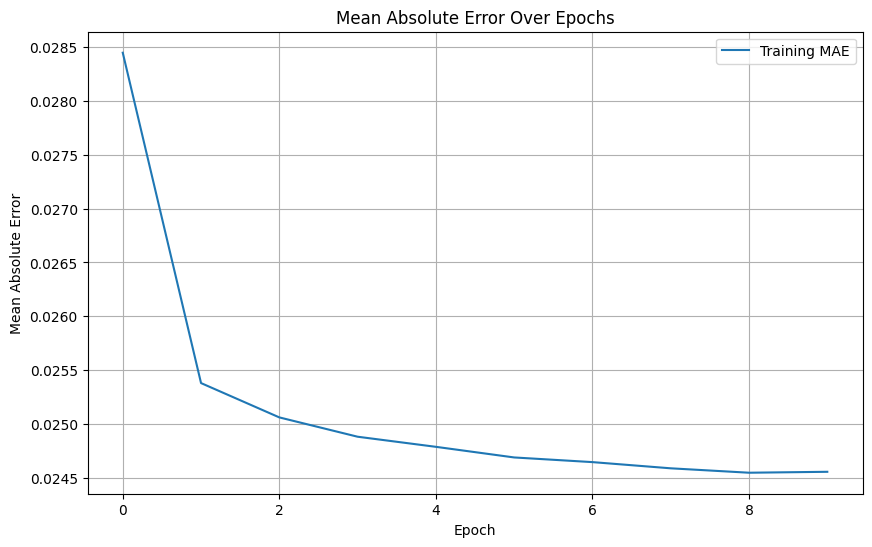

In [8]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(train_mae, label='Training MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [9]:
predictions = model.predict(X_test_scaled[0:1])
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.8644957]], dtype=float32)

In [13]:
y_pred

array([[0.8644957 ],
       [0.8789891 ],
       [0.9416869 ],
       ...,
       [0.9002471 ],
       [0.9489557 ],
       [0.90333396]], dtype=float32)

In [14]:
y_test

241755     0.838334
1015242    0.910257
187199     0.937748
646788     0.963262
1040290    0.865358
             ...   
207034     0.960251
1214731    0.945787
684266     0.900807
457273     0.979310
967569     0.773211
Length: 265503, dtype: float64

In [15]:
# mean percentage error
mpe = sum(abs(y_pred.flatten() - y_test.to_numpy())/y_test.to_numpy())/len(y_test) * 100

print(f"Mean percentage error: {mpe} %")

Mean percentage error: 2.4481390427032403 %
